In [2]:
import numpy as np
np.random.seed(2023 - 5 - 21)
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Let's say that we have 2 bags -> A and B
# Each have a number of vouchers whose monetary values range from negative to positive.

In [4]:
A = np.array([ -2,  -6, -15, -15,  -8,  -1, -13,  -8,  -1,  -9,  -6,  -7, -15,
       -14, -14,  -9,  -3,  -4,  -2, -14, -15, -10, -15, -13, -14, -15,
        -1, -10,  -9,  -5,  -2, -12, -12,  -8, -11,  -4,  -2,  -4, -10,
       -15,  -9,  -3,  -6,  -9,  -2, -13,  -8,  -3,  -6, -14,  -4,  -5,
        -4,  -5,  -2,  -6, -14, -10,  -4,  -6,  -4, -11, -13,  -4,  -5,
       -13, -11, -14,  -4,  -6, -14, -14, -14, -11,  -3,  -7,  -7, -15,
       -10, -15, -13,  -9, -10,  -6,  -4, -10, -13,  -6,  -1, -10,  -8,
        -4, -14, -14, -11,  -6,  -4,  -2,  -5,  -9, -10, -12,  -9,  -3,
        -5,  -6,  -1, -12,  -3,  -7,  -9, -15,  -2,  -4,  -4,  -4,  -6,
        -5,  -7,  -6,  -4,  -1,  -5, -14,  -8, -12,  -7,  -6, -14,  -9,
       -10, -13,  -8,  -6, -11, -10,  -9, -14,  -5, -15, -13,  -7, -15,
       -13, -10,  -7,  -3,  -1, -13,  -5,  -3, -13,  -6, -12, -14,  -2,
       -11,  -3,  -3, -12,  -1, -13, -14,  -6,  -8,  -1, -14,  -1, -15,
        -2, -12,  -1,  -5, -15,  -4,  -6, -11,  -3,  -6,  -7,  -2, -13,
       -10,  -1,  -7,  -3,  -9, -12,  -6, -11,  -1, -12,  -6, -10, -11,
        -1, -12,  -4,  -8, -11,   7,   3,   8,   6,   8,   5,   1,   9,
         1,   9,   5,   1,   7,   8,   1,   8,   8,   2,   1,   9,   5,
         4,   0,   5,   6,   0,   6,   4,   9,   5,   1,   1,   2,   8,
         0,   4,   1,   8,   2,   3,   3,   5,   9,   7,   5,   8,   9,
         3,   2,   3,   9,   7,   7,   7,   1,   7,   8,   9,   2,   7,
         7,   5,   3,   1,   9,   3,   7,   6,   5,   3,   4,   0,   3,
         3,   2,   4,   4,   5,   5,   2,   4,   0,   1,   7,   7,   5,
         7,   6,   4,   3,   5,   8,   7,   6,   1,   8,   0,   8,   3,
         3])

B = np.array([ -6,  -6,  -8, -10,  -6,  -3,  -3,  -6,  -2,  -8,  -3,  -2,  -3,
        -2,  -2,  -3,  -1, -10,  -6,  -4,  -4, -10,  -3, -10,  -6,  -3,
        -4,  -8,  -9,  -7,  -4,  -8,  -7,  -2,  -2,  -5,  -8,  -1,  -8,
        -6,  -9,  -1,  -5,  -8,  -6,  -8,  -1,  -8,  -8, -10,  -7,  -4,
        -4,  -8,  -2,  -5,  -4,  -3,  -9,  -3,  -2,  -1,  -6,  -3,  -2,
       -10,  -3,  -3,  -3, -10,  -6,  -1,  -6,  -5,  -6,  -2,  -3,  -1,
        -7,  -7,  -6,  -8,  -3,  -6,  -5,  -3,  -9,  -7,  -4,  -1,  -1,
        -7,  -8,  -9,  -8,  -9,  -3, -10,  -8,  -4,  -8,  -2,  -3,  -7,
        -2,  -1,  -4,  -7,  -2,  -1, -10,  -5,  -1,  -4,  -9,  -7,  -1,
        -3,  -4,  -3,  -9,  -6,  -7,  -3,  -2,  -3,  -1,  -2,  -4,  -7,
        -7,  -3,  -7,  -4,  -1,  -9,  -1,  -1,  -3,  -4,  -4,  -9,  -3,
        -6,  -4,  -5,  -2,  -6,  -4,  -4,   8,   4,   4,   9,   9,   9,
         0,   7,   4,  13,   1,  12,   5,  13,   8,   3,  14,  10,  12,
         9,   9,  13,   7,  11,   3,   2,  10,   3,  12,   1,  12,  13,
        12,   6,   8,  12,   9,  14,   3,   0,  14,   0,   5,   1,   0,
        12,   0,   8,   9,   0,   7,   0,   5,   5,   0,  12,   3,   1,
        14,   0,   6,   4,  12,   5,  10,  13,   4,  14,   5,  14,   3,
        14,  14,   9,   9,   3,  11,   1,   5,  13,   9,  12,  10,   0,
        12,  13,   1,   7,   2,  10,   1,  13,  10,   7,  13,  10,  10,
        14,  14,   9,  14,   6,   5,  11,   8,   8,   3,   3,   9,  13,
        12,  12,   2,   3,  10,  13,   2,  13,  10,  12,  12,   7,  12,
         6,   2,   7,  10,  12,   8,   5,   7,  11,   8,   4,   1,   6,
        12,   7,  14,   0,   5,   0,  10,   1,  11,  10,   5,   8,  11,
         2])

In [5]:
np.unique(A, return_counts = True)

(array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9]),
 array([14, 18, 14, 11, 11, 14, 12,  9, 10, 21, 11, 18, 12, 11, 14,  6, 12,
         7, 13,  8, 13,  6, 14, 12,  9], dtype=int64))

In [6]:
print(f"Total value of all vouchers in bag A is: {A.sum()} and bag B is: {B.sum()}")

Total value of all vouchers in bag A is: -1139 and bag B is: 396


In [7]:
_A = pd.Series(np.unique(A, return_counts = True)[1], index = range(-15, 10))
_B = pd.Series(np.unique(B, return_counts = True)[1], index = range(-10, 15))

In [8]:
ftable = pd.DataFrame({"A": _A, "B": _B}, dtype = np.int64)

In [9]:
ftable

,A,B
-15,14.0,NaN
-14,18.0,NaN
-13,14.0,NaN
-12,11.0,NaN
-11,11.0,NaN
-10,14.0,9.0
-9,12.0,10.0
-8,9.0,16.0
-7,10.0,14.0
-6,21.0,17.0


In [42]:
ftable.fillna(0, inplace = True)

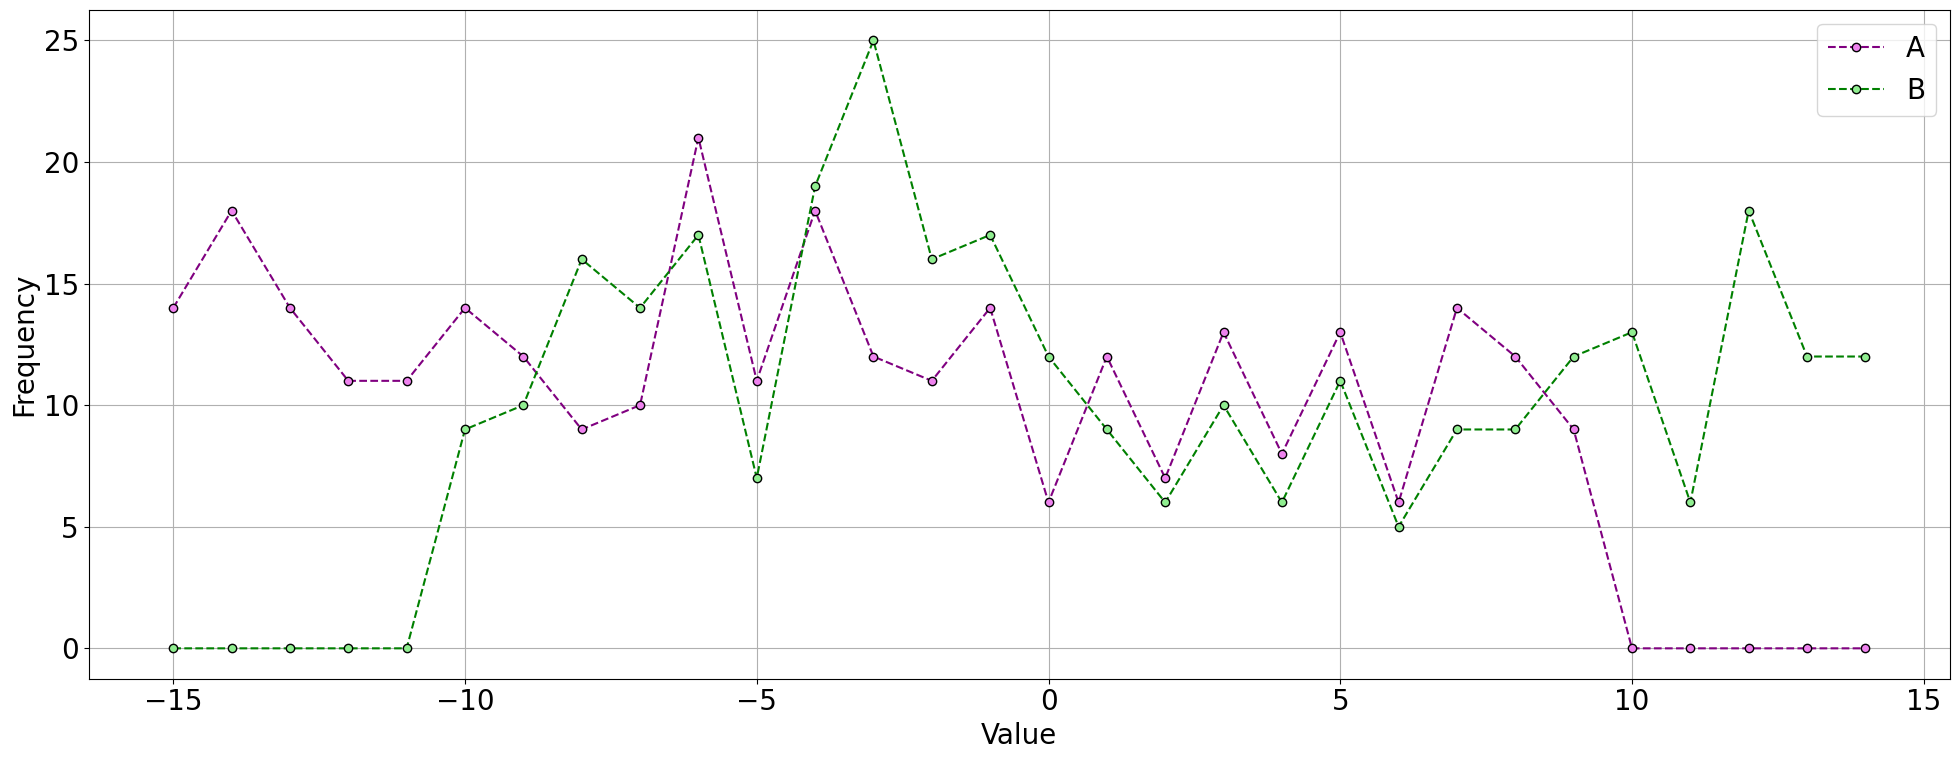

In [11]:
plt.rcParams["figure.figsize"] = 20, 8
plt.rcParams["font.size"] = 20
plt.plot(ftable.A, label = "A", marker = "o", linestyle = "--", mec = "black", mfc = "violet", color = "purple")
plt.plot(ftable.B, label = "B",  marker = "o", linestyle = "--", mec = "black", mfc = "lightgreen", color = "green")
plt.grid()
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

# plt.savefig("bags.jpeg", format = "jpeg", dpi = 300)

In [12]:
# Now we have the data from two bags, let's remove the labels -> Now we're left with two bags without labels.
# Let's randomly pick one voucher from the bag at hand and given the value of the voucher can we say which bag it was taken from?

![Bags](./bags.jpeg)

In [13]:
# Say that we got a $ -10 voucher, frequency of $ -10 vouchers in 
# Bag A is 15
# Bag B is 14

# Since bag A has a higher frequency of $ -10 vouchers, the bag we selected the voucher from is likely to be bag A by a smaller margin.
# Since the difference is not that significant.

In [14]:
A.size, B.size

(300, 300)

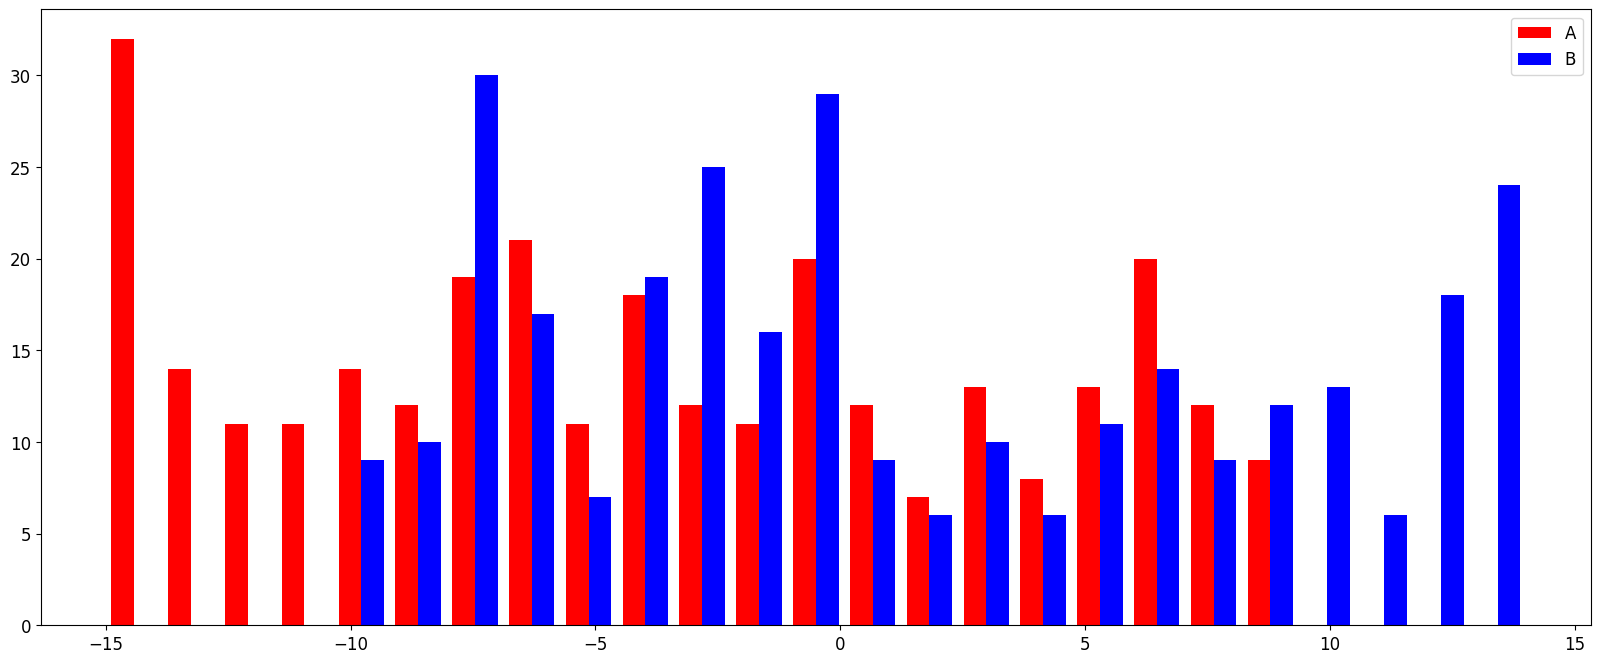

In [15]:
# Another way to view this problem is to view the distributions of the two bags as two different models.

plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = 20, 8
plt.hist([A, B], bins = 25, rwidth = 0.8, color = ["red", "blue"], label = ["A", "B"])
plt.legend()
plt.show()

In [16]:
# Null hypothesis -> the choosen voucher is from bag A
# Alternative hypothesis -> the chosen voucher is from bag B

In [17]:
# If we got a $ -15 voucher, we know that the bag is A with 100% certainty since it is the only bag that has $ -15 vouchers.
# => Null hypothesis accepted.

# If we git a $ 14 voucher, we know that the bag is B with 100% certainty since it is the only bag that has $ 14 vouchers.
# Null hypothesis rejected, Alternative hypothesis accepted.

In [18]:
# How about a $ $ 3 voucher? It can come from either of the bags.

print(f"Probability of getting a $ 3 voucher from bag A: {_A[3] / A.size}")
print(f"Probability of getting a $ 3 voucher from bag B: {_B[3] / B.size}")

Probability of getting a $ 3 voucher from bag A: 0.043333333333333335
Probability of getting a $ 3 voucher from bag B: 0.03333333333333333


In [19]:
# The probability of getting a 3 dollar voucher from bag A > getting a 3 dollar voucher from bag B
# => Null hypothesis accepted.

In [20]:
# How about $ 0 vouchers?

print(f"Probability of getting a $ 0 voucher from bag A: {_A[0] / A.size}")
print(f"Probability of getting a $ 0 voucher from bag B: {_B[0] / B.size}")

Probability of getting a $ 0 voucher from bag A: 0.02
Probability of getting a $ 0 voucher from bag B: 0.04


In [21]:
# The probability of getting a 0 dollar voucher from bag A < getting a 0 dollar voucher from bag B
# => Null hypothesis rejected, Alternative hypothesis accepted.

In [22]:
# Larger values (10 - 15) are more likely to come from bag B => Alternative hypothesis.
# Smaller values (-15 - -10) are more likely to come from bag A => Null hypothesis.

## ___Decision Rule___
---------

In [23]:
# Let's say that we'd assume bag A if the voucher value is less than 0
# Assume bag B if the voucher value is greater than / equal to 0.

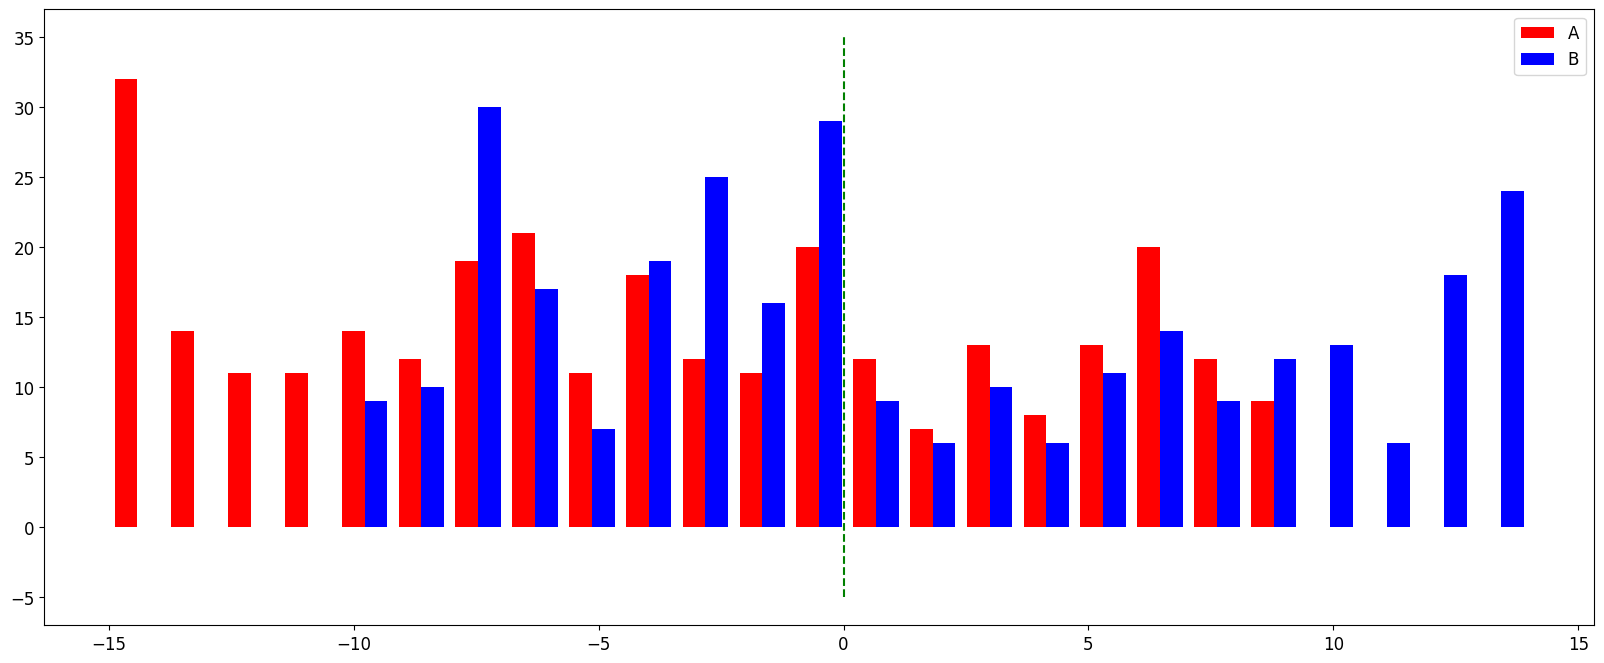

In [24]:
plt.hist([A, B], bins = 25, rwidth = 0.8, color = ["red", "blue"], label = ["A", "B"])
plt.vlines(x = 0, ymin = -5, ymax = 35, color = "green", linestyle = "--")
plt.legend()
plt.show()

In [25]:
# Since we assume all values < 0 come from bag A => Null hypothesis.
# Values > 0 come from bag B => Alternative hypothesis.

In [26]:
# However is this rule reasonable?

# Sure, if the value is below -10 it would certainly have come from bag A
# But what about values that are >= -10 and < 0 ???

# Similarly, if the value is > 10, then it sure is bag B
# But what about the values > 0 and <= 10 ???

# With how much confidence we can make such statements??
# There are decent amount of chances for these to be wrong.

In [27]:
# Let's say that we pick a 5 dollar voucher,
# Frequencies of $ 5 vouchers in bag A and bag B are:

_A[5], _B[5]

(13, 11)

In [123]:
# We'd decide that it was bag B based on our decision rule.
# But there is a greater chance for it to have come from bag A.

In [137]:
# What is the probability of rejecting the Null hypothesis when the Null is true?
# Null is true => bag A

# The range in which we reject Null hypothesis is => 0 > value
# How many values are in that range in bag A?

_A.loc[_A.index > 0].sum()

94

In [28]:
# So, the probability of incorrectly rejecting the Null hypothesis is 

94 / _A.sum()

0.31333333333333335

In [29]:
# The next type of mistake is accepting the Null hypothesis when it is incorrect (Alternative is true).
# Alternative hypothesis => bag B

# The range in which we'd accept the Null hypothesis is => value >= 0
# How many values in bag B fall in this range?

_B.loc[_B.index >= 0].sum()

150

In [30]:
# So, the probability of incorrectly accepting Null hypothesis is 
# i.e accepting the Null hypothesis when the alternative is true.

150 / _B.sum()

0.5

In [145]:
# These two types of errors have special names and notations.

## ___Type 1 Error: Reject Null when Null is True &rarr; $\alpha$___
## ___Type 2 Error: Accept Null when Alternative is True &rarr; $\beta$___

In [35]:
# When we move the decision line (which currently is at 0), we'd be changing the alpha and beta.
# Picking the $ 0 value is equivalent to picking the alpha value.

# when we pick the $ 0 voucher as the margin,
# alpha = P(Rejecting the Null) / |Null|

# Null => bag A
# this is the chance of Null being true when value < 0
_A.loc[_A.index < 0].sum()

200

In [38]:
# chance of Null being true when value >= 0
_A.loc[_A.index >= 0].sum()

100

In [39]:
# But according to our rule, we'd reject Null when value >= 0
# So, there's a 100 / 300 chance to reject Null when it is actually true.

In [40]:
# alpha = 

100 / 300

0.3333333333333333

In [47]:
# Let's say we pick a voucher from an unlabelled bag and the voucher turns out to be a $ -8 voucher
# According to our rule we'd assume that it came from bag A

ftable.A[-8], ftable.B[-8]

(9.0, 16.0)

In [49]:
# However, there's a greater chance for it to have come from bag B
# Here we are selecting the Null when the alternative is true

# the chances for alternative to be true when value < 0
# i.e when we'd accept Null where alternative is true

_B.loc[_B.index < 0].sum()

150

In [50]:
# beta = 150 / 300

_B.loc[_B.index < 0].sum() / _B.sum()

0.5

In [51]:
# When we set the alpha upfront,
# we could calculate the probability of how compatible is our data with Null => this probability is the p value
# If p is small => results are not compatible with the Null hypothesis => Null will be rejected & alternative will be accepted.

In [52]:
# A universal rule is to reject the Null when the p value is < alpha.
# when p value < the chance of rejecting Null when Null is true.

In [54]:
# If the selected voucher was a $ 6 one => we'd select the alternative hypothesis.

_B[6]

5

In [56]:
# The p value of getting a $ 6 voucher from bag B is 

_B[6] / _B.sum()

0.016666666666666666

In [58]:
# SOMETHING IS WRONG HERE

In [59]:
# let's say the alpha we chose was 0.05

(_B[6] / _B.sum()) < 0.05

True

In [60]:
# So, we'd reject the Null